# Análisis de factores asociados a crímenes violentos (Communities & Crime)

## Temática y fuente

Los datos combinan datos socioeconómicos del censo de 1990, datos de aplicación de la ley de la encuesta de gestión y estadísticas administrativas de aplicación de la ley de 1990 y datos sobre delincuencia de la UCR.

El dataset se obtuvo desde https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized





## Información adicional sobre el Dataset

Los conjuntos de datos de origen debían combinarse mediante programación. Se incluyen muchas variables para poder probar algoritmos que seleccionan o aprenden pesos para atributos. Sin embargo, no se incluyeron atributos claramente no relacionados; se eligieron atributos si había alguna conexión plausible con el delito (N=125), más las variables del delito que son variables dependientes potenciales. Las variables incluidas en el conjunto de datos involucran a la comunidad, como el porcentaje de la población considerada urbana y el ingreso familiar medio, e involucran a las fuerzas del orden, como el número per cápita de agentes de policía y el porcentaje de agentes asignados a unidades de drogas. Los atributos delictivos (N=18) que podrían predecirse son los 8 delitos considerados 'delitos índice' por el FBI) (asesinatos, violaciones, robos, .... ), versiones per cápita (en realidad por cada 100.000 habitantes) de cada uno,y Delitos Violentos Per Capita y Delitos No Violentos Per Capita).
  
Una limitación fue que la encuesta LEMAS se realizó en los departamentos de policía con al menos 100 oficiales, más una muestra aleatoria de departamentos más pequeños. Para nuestros propósitos, se omitieron las comunidades que no se encuentran en los conjuntos de datos censales y sobre delincuencia. A muchas comunidades les faltan datos de LEMAS.

Las variables de delitos per cápita se calcularon utilizando valores de población incluidos en los datos del FBI de 1995 (que difieren de los valores del censo de 1990).

La variable delitos violentos per cápita se calculó utilizando la población y la suma de las variables delictivas consideradas delitos violentos en los Estados Unidos: asesinato, violación, robo y agresión. Al parecer hubo cierta controversia en algunos estados sobre el recuento de violaciones. Esto dio lugar a que faltaran valores para la violación,lo que dio lugar a que faltaran valores para los delitos violentos per cápita. Muchas de estas comunidades omitidas eran del medio oeste de Estados Unidos (Minnesota, Illinois y Michigan tienen muchas de ellas).  
  
La variable de delitos no violentos per cápita se calculó utilizando la suma de las variables delictivas consideradas delitos no violentos en Estados Unidos: robos, hurtos, hurtos de automóviles e incendios provocados. (Existen muchos otros tipos de delitos, entre los que sólo se incluyen los 'delitos índice' del FBI)



## Objetivo

Entender qué variables socioeconómicas y demográficas están asociadas a la tasa de crímenes violentos para priorizar políticas públicas y decisiones operativas.

La variable targuet será "ViolentCrimesPerPop"

# Análisis

## Bloques de códigos

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns


## EDA

In [ ]:
url = 'https://drive.google.com/file/d/1U1B0kG40_1uLM3Pu28LkzKT42jGt25RN/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_orig = pd.read_csv(path, na_values=['?'], header=None)

In [ ]:
df_orig.shape

(2215, 147)

In [ ]:
df_orig.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
1176,Longmeadowtown,MA,13.0,36300.0,6,15467,2.89,0.80,96.50,2.46,...,41.0,258.09,260.0,1636.66,11.0,69.24,3.0,18.88,44.06,1982.88
1138,Bedfordtown,MA,17.0,4615.0,6,12996,2.90,2.70,93.65,3.09,...,37.0,274.64,96.0,712.59,7.0,51.96,0.0,0.00,141.03,1039.19
931,Hillsidetownship,NJ,39.0,31980.0,5,21044,2.96,40.76,53.02,3.86,...,274.0,1268.93,674.0,3121.38,360.0,1667.21,5.0,23.16,926.23,6080.67
132,Madisontownship,OH,49.0,46410.0,1,18749,2.90,2.27,96.66,0.62,...,88.0,415.70,322.0,1521.09,21.0,99.20,9.0,42.51,240.92,2078.51
1455,GoldenValleycity,MN,53.0,24308.0,7,20971,2.53,2.68,94.71,2.08,...,139.0,667.34,440.0,2112.44,51.0,244.85,5.0,24.00,NaN,3048.63
83,Scotttownship,PA,3.0,68388.0,1,17118,2.29,0.59,97.87,1.37,...,62.0,356.12,176.0,1010.91,47.0,269.96,3.0,17.23,40.21,1654.22
1799,Rosemeadcity,CA,NaN,NaN,9,51638,3.77,0.62,35.44,34.33,...,631.0,1206.85,893.0,1707.95,452.0,864.49,10.0,19.13,1262.31,3798.41
672,Summervilletown,SC,NaN,NaN,4,22519,2.78,17.84,80.61,0.74,...,314.0,1391.10,1244.0,5511.25,95.0,420.88,0.0,0.00,699.98,7323.23
1855,Romecity,NY,65.0,63418.0,9,44350,2.82,7.95,89.42,1.27,...,215.0,486.95,580.0,1313.64,49.0,110.98,8.0,18.12,140.42,1929.70
184,MountLaureltownship,NJ,5.0,49020.0,1,30270,2.56,5.97,90.82,2.63,...,200.0,645.49,383.0,1236.12,81.0,261.43,2.0,6.45,103.28,2149.50


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, 0 to 146
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [ ]:
df_orig.isna().sum()

,0
0,0
1,0
2,1221
3,1224
4,0
...,...
142,3
143,91
144,91
145,221


In [ ]:
df_orig.describe()

,2,3,4,5,6,7,8,9,10,11,...,137,138,139,140,141,142,143,144,145,146
count,994.000000,991.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000,2118.000000
mean,65.587525,45209.251261,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,...,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,117.831399,25425.861573,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,...,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518,2739.708901
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,11.000000,22887.000000,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,...,95.000000,511.690000,392.000000,2040.080000,30.000000,156.952500,1.000000,7.670000,161.700000,2918.070000
50%,27.000000,46925.000000,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,...,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
75%,80.500000,65805.000000,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,...,508.000000,1350.232500,1675.000000,4335.410000,232.500000,589.775000,16.000000,42.852500,794.400000,6229.280000
max,840.000000,94597.000000,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


## Columnas





 Este dataset original (UCI Communities & Crime) no trae headers en el archivo crudo, si traigo información desde API queda incompleto el encabezado, entonces, agrego el encabezado a traves del diccionario.



## API

In [ ]:
# de la página desde donde extraje el dataset, traigo información de las variables
# para nombrar las columnas del data
df = pd.read_html('https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized')
type(df)

list

In [ ]:
len(df)

2

In [ ]:
df[0]

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,communityname,ID,Categorical,NaN,NaN,NaN,no
1,State,Feature,Categorical,NaN,NaN,NaN,no
2,countyCode,ID,Integer,NaN,NaN,NaN,yes
3,communityCode,ID,Integer,NaN,NaN,NaN,yes
4,fold,ID,Integer,NaN,NaN,NaN,no
5,pop,Feature,Integer,NaN,NaN,NaN,no
6,perHoush,Feature,Continuous,NaN,NaN,NaN,no
7,pctBlack,Feature,Continuous,Race,NaN,NaN,no
8,pctWhite,Feature,Continuous,Race,NaN,NaN,no
9,pctAsian,Feature,Continuous,Race,NaN,NaN,no


In [ ]:
# con la lista extraida de la página, armo un diccionario

arch_url = 'https://docs.google.com/spreadsheets/d/1UAcf5aMDKFqOaYKc5OngAjdH_3SSFcfe/edit?usp=drive_link&ouid=116161815519757514283&rtpof=true&sd=true'
arch_id = arch_url.split('/')[-2]
down_url = f'https://docs.google.com/spreadsheets/d/{arch_id}/export?firmat=xlsx'

diccionario_variables = pd.read_excel(down_url)
diccionario_variables.sample(30)

,Variable,Descripción,Tipo
8,racePctWhite,Porcentaje de la población que es caucásica,decimal
34,PctLess9thGrade,Porcentaje de personas de 25 años o más con me...,decimal
110,PolicPerPop,Agentes de policía por cada 100 mil habitantes,decimal
92,MedRent,Renta bruta mediana (incluye servicios públicos),decimal
96,NumInShelters,Número de personas en refugios para personas s...,integer
3,communityCode,Código numérico para la comunidad- no predicti...,numeric
119,PolicAveOTWorked,Promedio de horas extras trabajadas por la pol...,decimal
22,pctWPubAsst,Porcentaje de hogares con ingresos de asistenc...,decimal
81,MedYrHousBuilt,Unidades de vivienda de año medio construidas,numeric
19,pctWFarmSelf,Porcentaje de hogares con ingresos agrícolas o...,decimal


In [ ]:
# Al tener las variales indicadas en el diccionario, busco darle un encabazado al data original
columns_names = diccionario_variables ['Variable'].tolist()



In [ ]:
len(columns_names) == len(df_orig.columns)

True

In [ ]:
df_orig.columns = columns_names

In [ ]:
df_orig.sample(10)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
173,Readingcity,PA,11.0,63624.0,1,78380,2.50,9.71,78.64,1.42,...,1521.0,1940.67,3362.0,4289.63,585.0,746.41,52.0,66.35,1195.53,7043.06
329,Paradisetown,CA,NaN,NaN,2,25408,2.30,0.14,97.11,1.04,...,245.0,923.80,472.0,1779.72,38.0,143.28,6.0,22.62,252.63,2869.42
1233,Bountifulcity,UT,NaN,NaN,6,36659,3.29,0.10,98.24,0.95,...,162.0,427.32,791.0,2086.47,37.0,97.60,11.0,29.02,137.16,2640.39
1518,CedarFallscity,IA,NaN,NaN,7,34298,2.93,1.12,96.92,1.41,...,121.0,355.22,879.0,2580.51,32.0,93.94,NaN,NaN,129.17,NaN
1532,Southingtontown,CT,3.0,70550.0,7,38518,2.80,0.91,97.97,0.68,...,241.0,624.97,743.0,1926.77,105.0,272.29,3.0,7.78,59.64,2831.80
2016,Hallandalecity,FL,NaN,NaN,10,30996,1.81,14.17,84.01,0.47,...,655.0,2151.99,1132.0,3719.16,284.0,933.07,3.0,9.86,1938.43,6814.07
2148,Oleancity,NY,9.0,54716.0,10,16946,2.46,2.69,95.74,0.61,...,84.0,493.91,587.0,3451.52,8.0,47.04,2.0,11.76,488.03,4004.23
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
2170,Overlandcity,MO,NaN,NaN,10,17987,2.51,6.38,91.63,1.36,...,150.0,811.95,823.0,4454.91,58.0,313.95,2.0,10.83,422.22,5591.64
358,UniversalCitycity,TX,NaN,NaN,2,13057,2.67,5.81,85.86,2.42,...,76.0,547.04,433.0,3116.68,28.0,201.54,2.0,14.40,NaN,3879.65


In [ ]:
df_orig.isnull().sum()

,0
communityname,0
state,0
countyCode,1221
communityCode,1224
fold,0
...,...
autoTheftPerPop,3
arsons,91
arsonsPerPop,91
ViolentCrimesPerPop,221


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, communityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


## Creamos un heatmap de valores faltantes

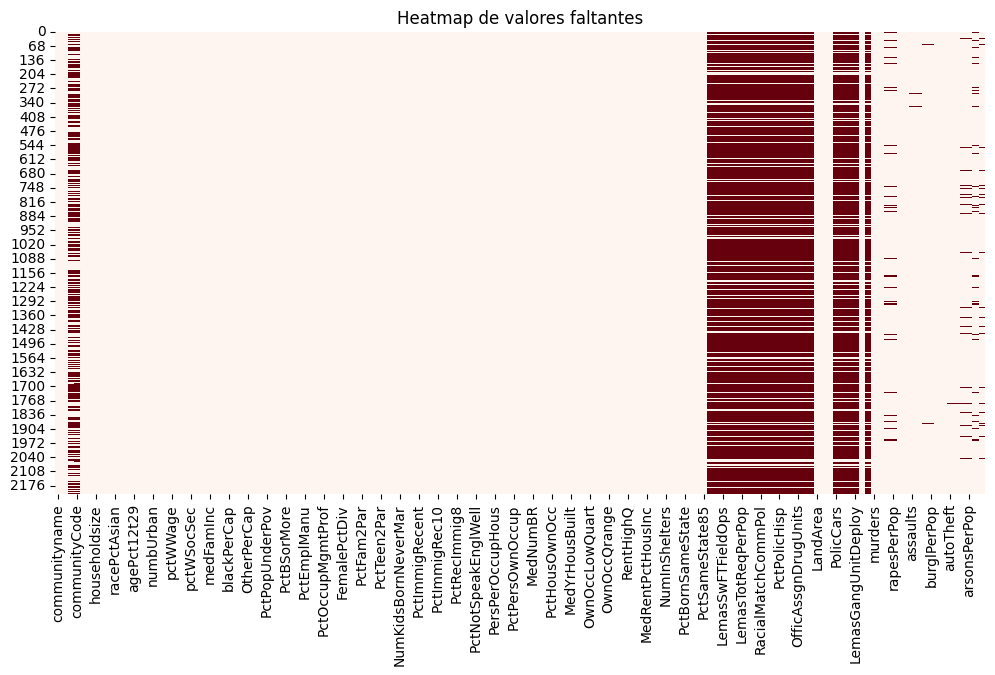

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='Reds')
plt.title("Heatmap de valores faltantes")
plt.show()

In [ ]:
# se verifica si hay datos duplicados
df_orig[df_orig.duplicated() == True]

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop


Sin valores duplicados

Evaluamos el porcentaje de datos perdidos o nulos

In [ ]:
perd_nul= df_orig.isna().mean().sort_values(ascending=False)
perd_nul.sample(30)


,0
PctSameHouse85,0.000000
ViolentCrimesPerPop,0.099774
racePctWhite,0.000000
PctRecImmig10,0.000000
PctRecentImmig,0.000000
PctRecImmig5,0.000000
MedOwnCostPctInc,0.000000
PctLess9thGrade,0.000000
PctPolicHisp,0.845147
OwnOccLowQuart,0.000000


Limpieza de columnas que no aportan información para el objetivo y modificación de tipos de datos

In [ ]:
thresh = 0.8  # Porcentaje de datos nulos o perdidos
elim_cols = perd_nul[perd_nul > thresh].index.tolist()
print('Eliminar columnas (>80% missing):', elim_cols) # se eliminan columnas con 80% nulos/perd
df_Col_excluidas = df_orig.drop(columns=elim_cols).copy()
for c in df_Col_excluidas.columns: # Convertimos las columnas que quedan en datos numéricos
    if df_Col_excluidas [c].dtype == object and c not in ['state','county','community','communityname','fold']:
       df_Col_excluidas = pd.to_numeric(df_Col_excluidas[c], errors='coerce') # Convierte los valores numéricos en NaN


Eliminar columnas (>80% missing): ['PctPolicBlack', 'PolicReqPerOffic', 'PolicPerPop', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'PolicAveOTWorked', 'LemasGangUnitDeploy', 'PolicBudgPerPop', 'PctPolicWhite', 'RacialMatchCommPol', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'NumKindsDrugsSeiz', 'OfficAssgnDrugUnits', 'PctPolicMinor', 'PctPolicAsian', 'LemasTotReqPerPop', 'LemasTotalReq', 'PctPolicHisp']


In [ ]:
print(df_Col_excluidas.dtypes)

communityname           object
state                   object
countyCode             float64
communityCode          float64
fold                     int64
                        ...   
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
Length: 125, dtype: object
